In [3]:
# for folders one level below the heirarchy
import sys
import os
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
sys.path.append(parent_dir)


from GWS_Summer2024.slmfunctions.dependencies import *
from GWS_Summer2024.slmfunctions.settings import *
from GWS_Summer2024.slmfunctions.simulation import *
from GWS_Summer2024.slmfunctions.imageprocessing import *
from GWS_Summer2024.slmfunctions.phaseretrieval import *

## More dependencies
import scipy.fft as spfft
from scipy.ndimage import gaussian_filter1d as sp_gaussian_filter1d
from scipy.ndimage import affine_transform as sp_affine_transform
from scipy.ndimage import gaussian_filter as sp_gaussian_filter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product

cupyon=True

try:
    import cupy as cp
    import cupyx.scipy.fft as cpfft
    import cupyx.scipy.ndimage
    from cupyx.scipy.ndimage import gaussian_filter1d as cp_gaussian_filter1d
    from cupyx.scipy.ndimage import gaussian_filter as cp_gaussian_filter
    from cupyx.scipy.ndimage import affine_transform as cp_affine_transform
except ImportError:
    cp = np
    cpfft = spfft
    cp_gaussian_filter1d = sp_gaussian_filter1d
    cp_gaussian_filter = sp_gaussian_filter
    cp_affine_transform = sp_affine_transform
    cupyon = False
    print("cupy not installed. Using numpy.")


In [30]:
import cupy as cp
import numpy as np

# Number of points in awgspace
X = 10000
aodsize = 500

awgspace = cp.linspace(0, 10, X)  # Discretized space for the waveform

# Maximum number of terms for Fourier series and Legendre polynomials
max_fourier_terms = 50

# Precompute Legendre polynomials using NumPy
# max_legendre_terms = 55
# legendre_polynomials_np = np.polynomial.legendre.legval(np.linspace(0, 1, X), np.eye(max_legendre_terms).T)
# legendre_polynomials = cp.array(legendre_polynomials_np)

def calculateAWGwaveform(fouriercoefficients, awgspace):
    """
    Calculate the AWG waveform given Fourier and Legendre coefficients.
    
    Parameters:
    fouriercoefficients (cp.ndarray): Coefficients for the Fourier series.
    legendrecoefficients (cp.ndarray): Coefficients for the Legendre polynomials.
    awgspace (cp.ndarray): Discretized space for the waveform.
    
    Returns:
    cp.ndarray: The resulting waveform in the awgspace.
    """
    # Initialize the waveform with zeros
    waveform = cp.zeros_like(awgspace)

    # Calculate Fourier components
    for n in range(max_fourier_terms):
        if n == 0:
            waveform += fouriercoefficients[n] * cp.ones_like(awgspace)
        else:
            waveform += (fouriercoefficients[2*n-1] * cp.sin(2 * cp.pi * n * awgspace) +
                         fouriercoefficients[2*n] * cp.cos(2 * cp.pi * n * awgspace))

    waveform = waveform
    return waveform

# def snapshot(waveform, time, velocity, aodsize):
    

# Example coefficients (for demonstration purposes, normally these would be optimized)
fouriercoefficients = cp.random.random(2 * max_fourier_terms) - 0.5

# Calculate the waveform
waveform = calculateAWGwaveform(fouriercoefficients / cp.linalg.norm(fouriercoefficients), awgspace)

# Convert the waveform back to numpy for visualization or other processing
waveform_numpy = cp.asnumpy(waveform)


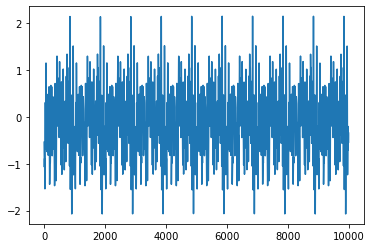

In [31]:
plt.plot(waveform_numpy)

In [23]:
waveform_numpy

array([ 0.01217907, -0.00013178, -0.01229298, ...,  0.03721274,
        0.02463036,  0.01217907])